In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


In [ ]:
os.listdir(path)

['train', 'Training_set.csv', 'Testing_set.csv', 'test']

In [ ]:
df = pd.read_csv(path + '/Training_set.csv')
df.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [ ]:
df['label'].unique()

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

<Axes: xlabel='label'>

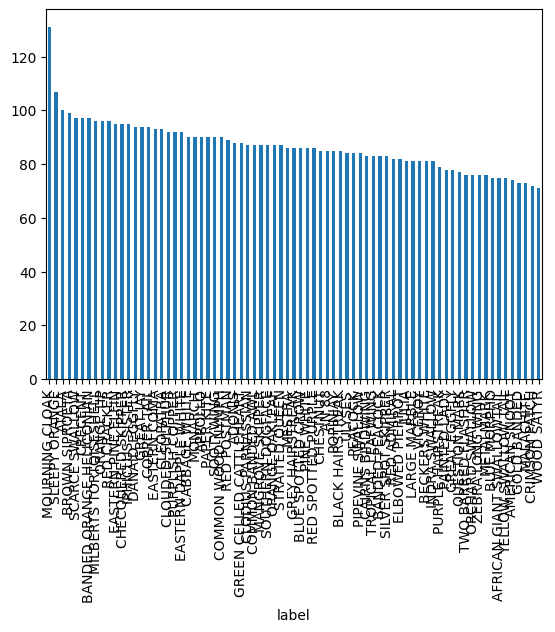

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df.shape

(6499, 2)

In [ ]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test_data = pd.read_csv(path + '/Testing_set.csv')
test_data.head()

filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0
)

In [ ]:
image_size = (150,150)
batch_size = 32
epochs = 40

In [ ]:
train_data = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=os.path.join(path,"train"),
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

val_data = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=os.path.join(path,"train"),
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


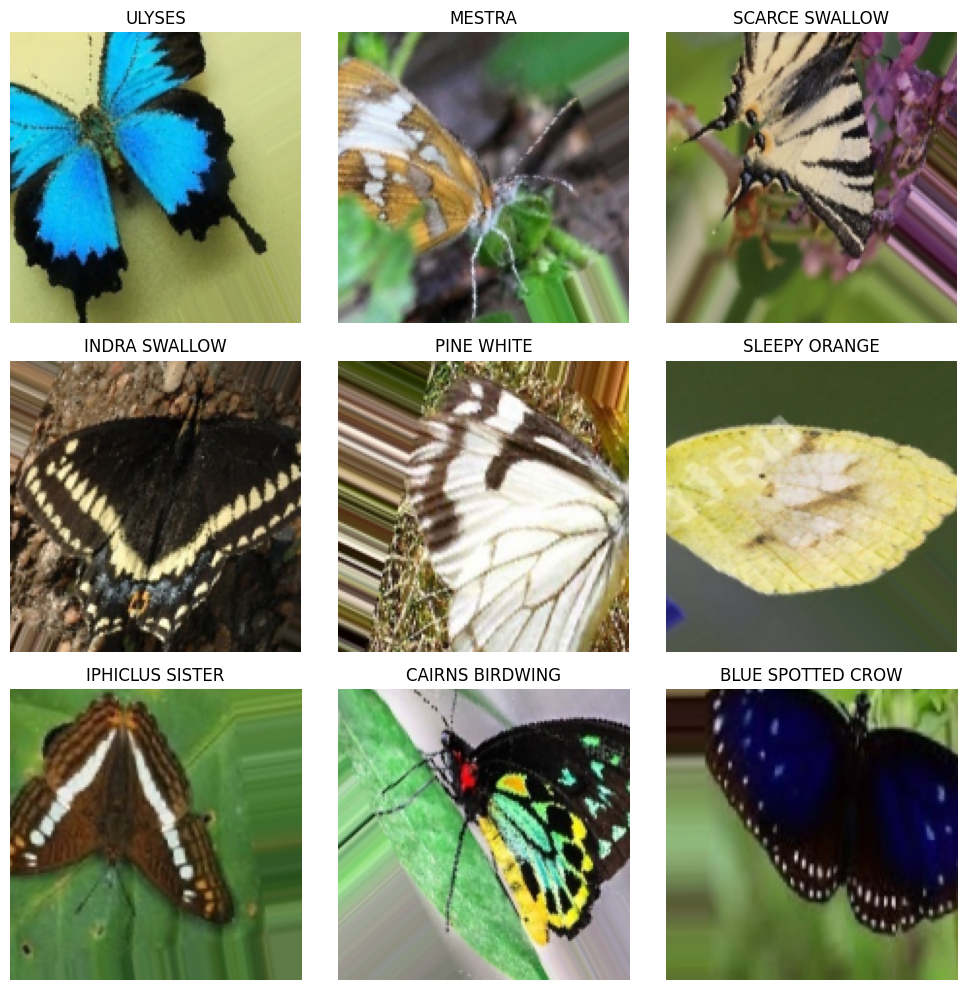

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_data)

class_names = {v: k for k, v in train_data.class_indices.items()}

random_indices = np.random.choice(len(images), 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[idx])
    label_index = np.argmax(labels[idx])
    label_name = class_names[label_index]
    plt.title(f"{label_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def build_model(input_size):
    input = tf.keras.layers.Input(input_size)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x =  tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x =  tf.keras.layers.MaxPooling2D(2,2)(x)

    x =  tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
    x =  tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(75, activation='softmax')(x)
    model = tf.keras.Model(input, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = build_model((150,150,3))

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,072,139 (72.75 MB)

 Trainable params: 19,072,139 (72.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_steps = int(train_data.n//batch_size)
val_steps = int(val_data.n//batch_size)

history = model.fit(train_data,
          validation_data=val_data,
          epochs=epochs,
          steps_per_epoch=train_steps,
          validation_steps=val_steps)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 44s 233ms/step - accuracy: 0.0401 - loss: 4.2432 - val_accuracy: 0.1531 - val_loss: 3.3888
Epoch 2/40
  1/162 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.0938 - loss: 3.1589

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0938 - loss: 3.1589 - val_accuracy: 0.1688 - val_loss: 3.3190
Epoch 3/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 73s 211ms/step - accuracy: 0.1778 - loss: 3.1645 - val_accuracy: 0.3094 - val_loss: 2.5557
Epoch 4/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3438 - loss: 2.4662 - val_accuracy: 0.3242 - val_loss: 2.4763
Epoch 5/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 43s 233ms/step - accuracy: 0.3048 - loss: 2.5766 - val_accuracy: 0.4563 - val_loss: 1.9907
Epoch 6/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5000 - loss: 2.0000 - val_accuracy: 0.4508 - val_loss: 1.9973
Epoch 7/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 217ms/step - accuracy: 0.4070 - loss: 2.1910 - val_accuracy: 0.4586 - val_loss: 1.9032
Epoch 8/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5312 - loss: 1.8254 - val_accuracy: 0.4391 - val_loss: 2.0188
Epoch 9/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.4438 - loss: 1.9380 - val_accuracy: 0

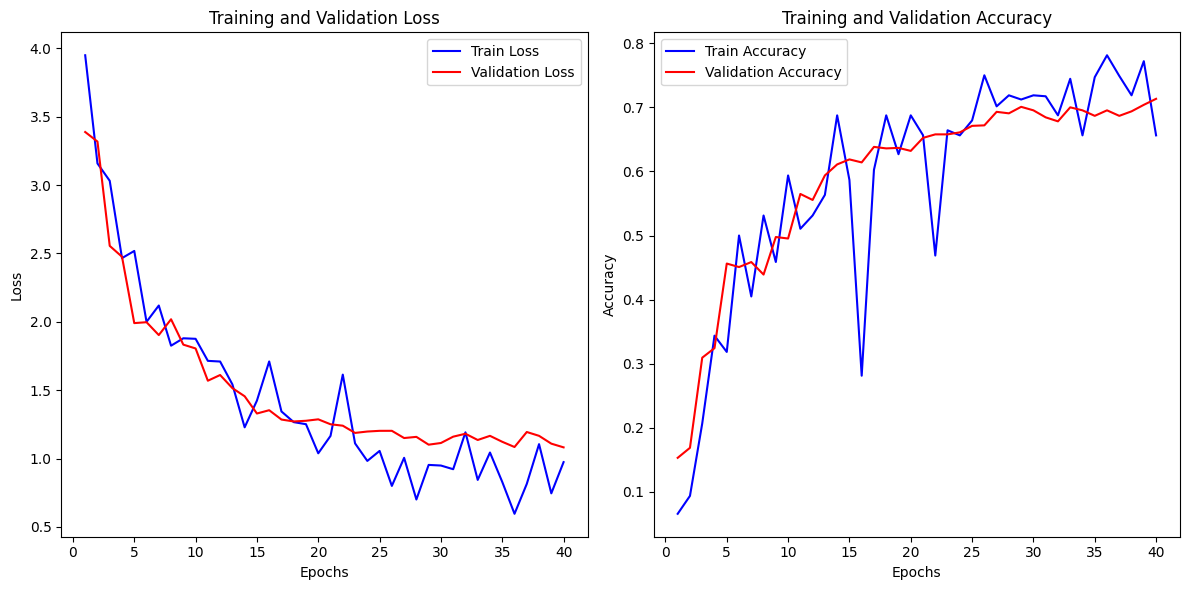

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


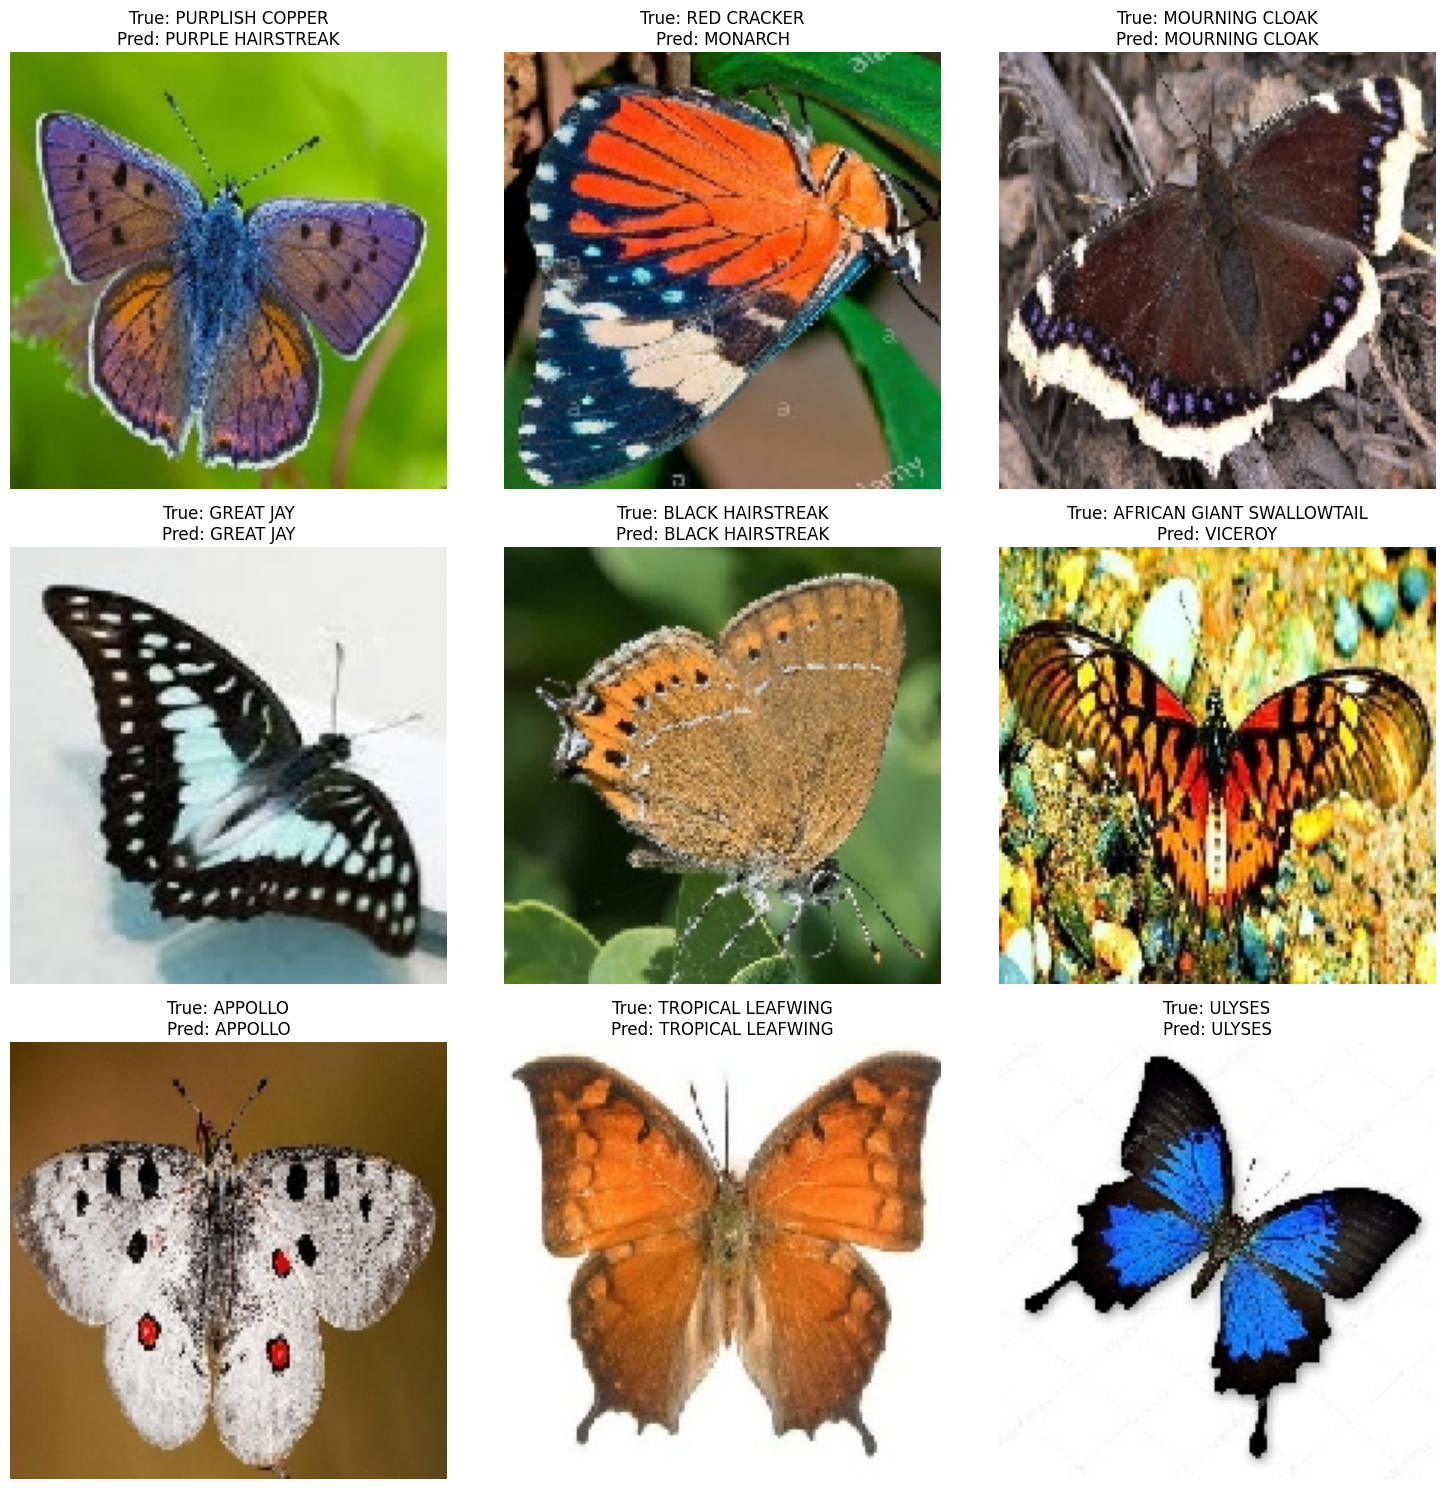

In [ ]:
val_images, val_labels = next(val_data)

pred_labels = model.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_data.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)